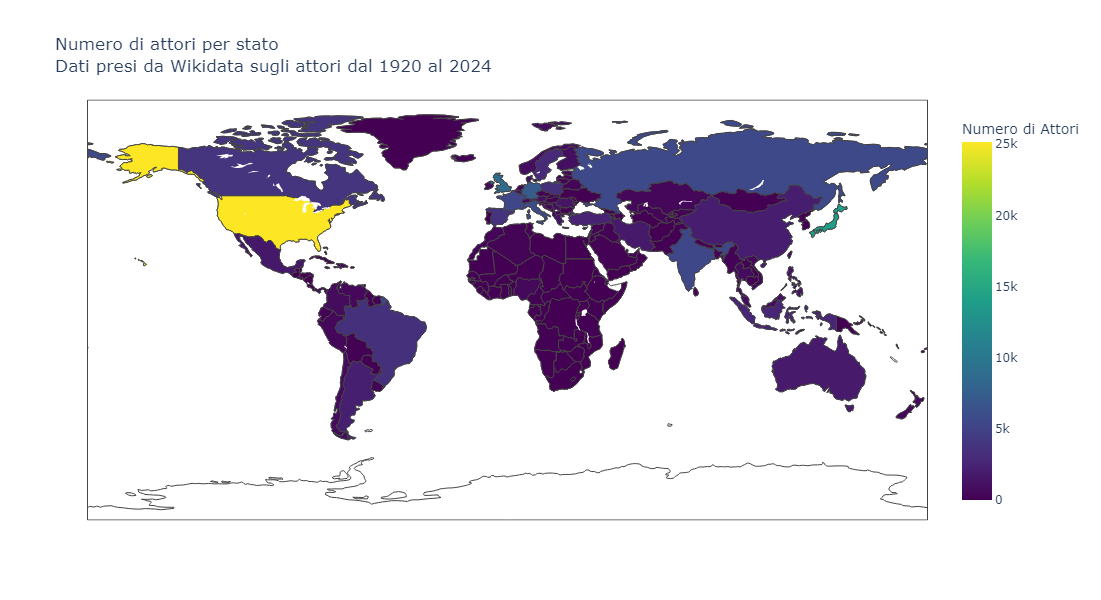

In [2]:
# Unimi 2023/2024
# Progetto di Visualizzazione Scientifica
# 984605 Pomayay Gabonal Angello Fernando 
# 01553A Mbaye Serigne Darou

import pandas as pd
import plotly.express as px

# Leggi i dati CSV
data = pd.read_csv("../actors.csv")

# Mappatura dei nomi dei paesi non standard o obsoleti
country_mapping = {
    "British India": "India",
    "Kingdom of Denmark": "Denmark",
    "Tsardom of Russia": "Russia",
    "Russian Empire": "Russia",
    "Russian Socialist Federative Soviet Republic": "Russia",
    "Russian Republic": "Russia",
    "Russian State": "Russia",
    "Second Polish Republic": "Poland",
    "Polish–Lithuanian Commonwealth": "Poland",
    "Polish People's Republic": "Poland",
    "Macedonia": "North Macedonia",
    "United Kingdom of Great Britain and Ireland": "United Kingdom",
    "Kingdom of Great Britain": "United Kingdom",
    "Mandatory Palestine": "Palestine",
    "State of Palestine": "Palestine",
    "Israeli-occupied territories": "Palestine",
    "Kingdom of Romania": "Romania",
    "Union of Bessarabia with Romania": "Romania",
    "Socialist Republic of Romania": "Romania",
    "Romanian People's Republic": "Romania",
    "Nazi Germany": "Germany",
    "West Germany": "Germany",
    "Allied-occupied Germany": "Germany"
}

# Sostituisco i nomi dei paesi nel DataFrame
data['birthCountryLabel'] = data['birthCountryLabel'].replace(country_mapping)

# Conteggio il numero di attori per ogni stato
actors_per_country = data['birthCountryLabel'].value_counts().reset_index()
actors_per_country.columns = ['Country', 'Actor Count']

# Imposto il valore massimo della scala colori
max_value = actors_per_country['Actor Count'].max()

# Creazione della mappa
fig = px.choropleth(actors_per_country, 
                    locations="Country", 
                    locationmode='country names',
                    color="Actor Count",
                    color_continuous_scale=px.colors.sequential.Viridis,
                    title="Numero di attori per stato<br>Dati presi da Wikidata sugli attori dal 1920 al 2024",
                    labels={'Actor Count':'Numero di Attori'},
                    range_color=(0, max_value),
                    )

fig.update_layout(
    geo=dict(
        showcoastlines=True,
    ),
    width=900, 
    height=600,
    coloraxis_colorbar=dict(
        lenmode='pixels',
        len=400,
    ),
    template="plotly_white"
)

fig.write_html("../file_html/actors_map_interactive_light.html")
fig.show()
